# Reinforcement Learning Agent Simulation for N-Armed Bandit 

In [31]:
import random
from matplotlib import pyplot as plt
from statistics import mean 

random.seed(1)

class rl_util:
    def argmax(l):
        f = lambda i: l[i]
        return max(range(len(l)), key=f)
    
    def epsmax(l, e):
        gen = random.random()
        if gen <= e:
            return random.randrange(len(l))
        else:
            return rl_util.argmax(l)        

    def rand_vec(mu, sig):
        rvec = []
        for i in range(len(mu)):
            rvec.append(random.gauss(mu[i], sig[i]))
        return rvec

    def alpha_vec(k):
        alph = []
        for i in range(len(k)):
            alph.append(1/(k[i]+1))                        
        return alph

    def Q(alpha, r, q):
        return q + alpha * (r - q)

    def Q_vec(alvec, rvec, qvec):
        Qvec = []
        for i in range(len(alvec)):
            Qvec.append(rl_util.Q(alvec[i], rvec[i], qvec[i]))
        return Qvec
    
    def n_armed_bandit_greedy(avec, svec, sz=1000, interact=True):
        sample = 100
        
        # initial sampling
        rvec = [[random.gauss(avec[i], svec[i]) for k in range(sample)] for i in range(len(avec))]
        qvec = [mean(rvec[i]) for i in range(len(avec))]
        steps = [0 for i in range(len(avec))]        
        plt.violinplot(rvec, showmeans=True, showextrema=False)

        for k in range(1, sz+1):       
            i = rl_util.argmax(qvec)                # take action 
            steps[i] += 1                           # increase step count for that bandit 
            rvec[i].append(random.gauss(avec[i], svec[i]))   # environment will generate next reward  
            qvec[i] = mean(rvec[i])                 # estimate value

            plt.violinplot(rvec,showmeans=True,showextrema=False)
            plt.plot(i+1,qvec[i], "o")
            plt.show()
            if interact:
                a=input("To quit Press Q else Press any key to continue: ")
                if a=='q' or a=='Q':
                    break
                    
    def n_armed_bandit_eps_greedy(avec, svec, eps=0.1, sz=1000, interact=True):
        sample = 100
        
        # initial sampling
        rvec = [[random.gauss(avec[i], svec[i]) for k in range(sample)] for i in range(len(avec))]
        qvec = [mean(rvec[i]) for i in range(len(avec))]
        steps = [0 for i in range(len(avec))]        
        plt.violinplot(rvec, showmeans=True, showextrema=False)

        for k in range(1, sz+1):       
            i = rl_util.epsmax(qvec, eps)                # take action 
            steps[i] += 1                           # increase step count for that bandit 
            rvec[i].append(random.gauss(avec[i], svec[i]))   # environment will generate next reward  
            qvec[i] = mean(rvec[i])                 # estimate value

            plt.violinplot(rvec,showmeans=True,showextrema=False)
            plt.plot(i+1,qvec[i], "o")
            plt.show()
            if interact:
                a=input("To quit Press Q else Press any key to continue: ")
                if a=='q' or a=='Q':
                    break


# 1. Greedy Method

Enter N for N-armed-bandit: 3
Now enter n reward means: 
mean1 : 4
variance1 : 2
mean2 : 6
variance2 : 2
mean3 : 8
variance3 : 2


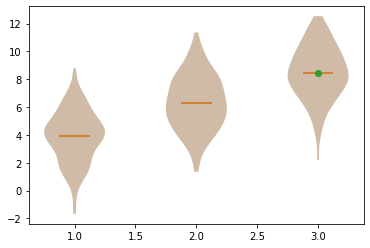

To quit Press Q else Press any key to continue: 


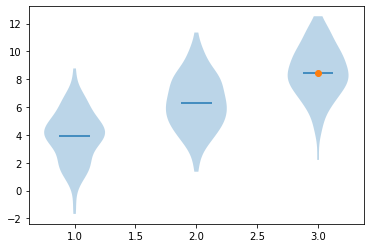

To quit Press Q else Press any key to continue: 


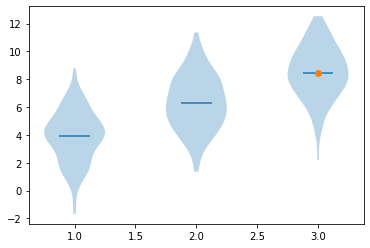

To quit Press Q else Press any key to continue: 


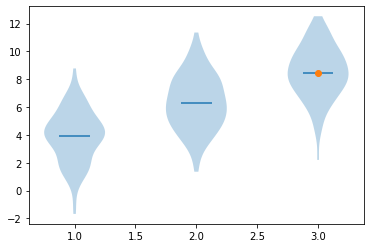

To quit Press Q else Press any key to continue: 


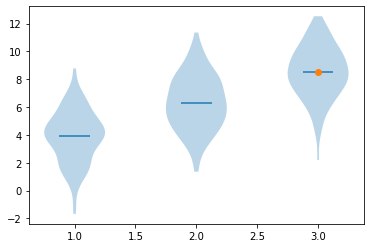

To quit Press Q else Press any key to continue: 


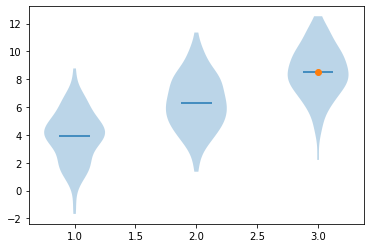

To quit Press Q else Press any key to continue: 


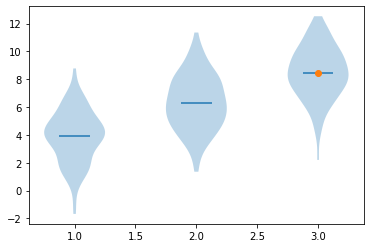

To quit Press Q else Press any key to continue: q


In [27]:
if __name__ == '__main__':
    n = int(input("Enter N for N-armed-bandit: "))
    print("Now enter n reward means: ")
    avec = []
    svec = []
    for i in range(1, n+1):
        avec.append(int(input("mean{} : ".format(i))))
        svec.append(int(input("variance{} : ".format(i))))

    rl_util.n_armed_bandit_greedy(avec,svec)

# 2. Epsilon Greedy Method

Enter N for N-armed-bandit: 4
Now enter n reward means: 
mean1 : 4
variance1 : 2
mean2 : 6
variance2 : 2
mean3 : 8
variance3 : 2
mean4 : 10
variance4 : 2


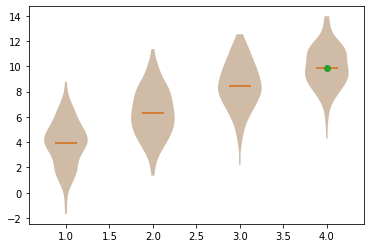

To quit Press Q else Press any key to continue: 


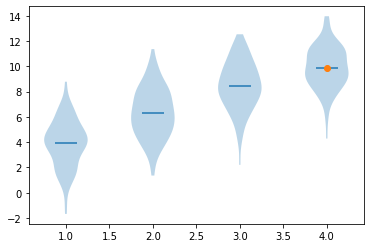

To quit Press Q else Press any key to continue: 


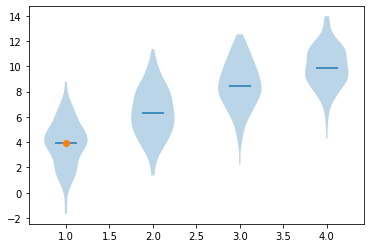

To quit Press Q else Press any key to continue: 


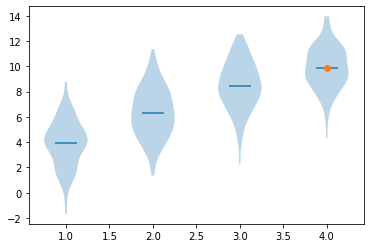

To quit Press Q else Press any key to continue: 


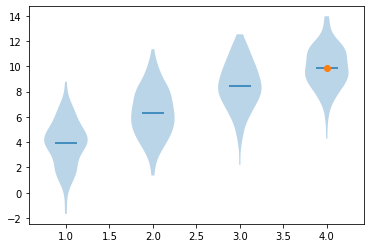

To quit Press Q else Press any key to continue: 


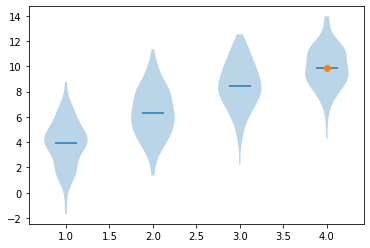

To quit Press Q else Press any key to continue: 


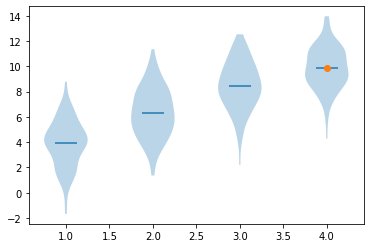

To quit Press Q else Press any key to continue: 


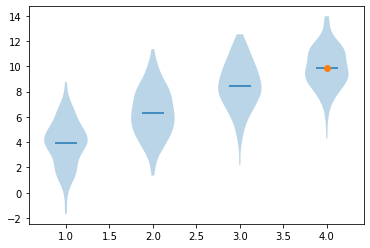

To quit Press Q else Press any key to continue: 


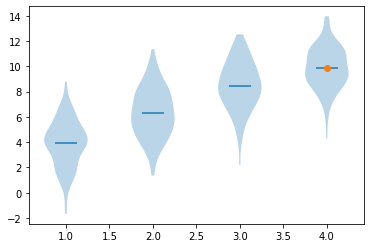

To quit Press Q else Press any key to continue: 


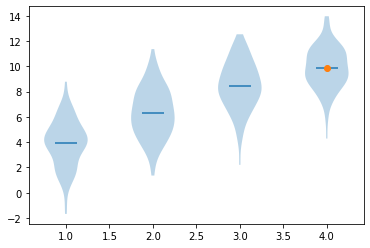

To quit Press Q else Press any key to continue: 


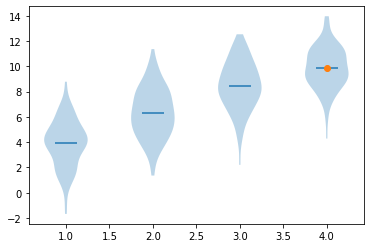

To quit Press Q else Press any key to continue: 


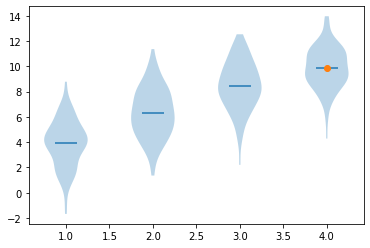

In [ ]:
if __name__ == '__main__':
    n = int(input("Enter N for N-armed-bandit: "))
    print("Now enter n reward means: ")
    avec = []
    svec = []
    for i in range(1, n+1):
        avec.append(int(input("mean{} : ".format(i))))
        svec.append(int(input("variance{} : ".format(i))))

    rl_util.n_armed_bandit_eps_greedy(avec,svec)

## Rough Work


Press any key


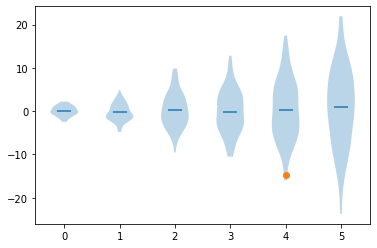

In [18]:
import numpy as np

input("Press any key")
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]
plt.violinplot(data,[0,1,2,3,4,5],showmeans=True,showextrema=False)
plt.plot(4,np.random.normal(0, pos[4], size=1), "o")

In [8]:
avec = [2,5,7]
svec = [3,1,2]
steps = [0 for i in range(len(avec))]
qvec = [0 for i in range(len(avec))]
for k in range(1, 20):
        rvec = rl_util.rand_vec(avec,svec)
        qvec = rl_util.Q_vec(rl_util.alpha_vec(steps), rvec, qvec)
        i = rl_util.argmax(qvec)
        steps[i] += 1
        print(qvec, rl_util.alpha_vec(steps))
        

[2.4815140381379894, 5.303554707826984, 5.022327150050774] [1.0, 0.5, 1.0]
[3.760375141441411, 5.71020352448191, 6.128654959432034] [1.0, 0.5, 0.5]
[-2.300464190990397, 4.975691350399081, 7.325985485553] [1.0, 0.5, 0.3333333333333333]
[-3.2010915755093015, 4.941907281296738, 6.556651466938337] [1.0, 0.5, 0.25]
[1.6065966740668438, 4.84869284727435, 6.675416991839911] [1.0, 0.5, 0.2]
[6.503622188910202, 5.134701645441115, 7.273818691618019] [1.0, 0.5, 0.16666666666666666]
[1.5757618570896383, 4.827557518807074, 7.354452437103679] [1.0, 0.5, 0.14285714285714285]
[-6.507372360040112, 4.893834352057503, 7.349579171538933] [1.0, 0.5, 0.125]
[-1.7056262320406237, 5.179099787315027, 7.166070574014826] [1.0, 0.5, 0.1111111111111111]
[-5.377300570830871, 4.98289069847354, 6.930097011502784] [1.0, 0.5, 0.1]
[0.43821238219956093, 4.915303139884085, 7.18728238019927] [1.0, 0.5, 0.09090909090909091]
[2.3094445368247705, 4.9434087574502055, 7.2409847849388616] [1.0, 0.5, 0.08333333333333333]
[-3.436